## Regresja wielu zmiennych

Będziemy tworzyli model regresji liniowej dla cen mieszkań w Poznaniu. Zestaw danych to 5000 aktualnych opisów z serwisu _gratka.pl_.


### Dane

Plik `gratkapl.csv` zawiera dane, na których należy zbudować model regresyjny.
Pierwszy wiersz w pliku to nagłówek zawierający opisy kolumn.

* Id - numer porządkowy oferty
* Expected - cena mieszkania
* Rooms - liczba pokoi
* SqrMeters - metraż mieszkania w $m^2$
* Floor - piętro
* Location - dzielnica lub adres w Poznaniu
* Description - fragment opisu mieszkania

#### Zadanie 1

Zaimplementuj poznane metryki: MAE, MSE oraz RMSE, a następnie porównaj poprawność swoich funkcji z tymi dostępnymi w bibliotece scikit-learn.
Dla przypomnienia:

$$\begin{array}{rll} MAE &=& \dfrac{1}{n} \displaystyle\sum_{i=1}^{n} \left|y_i  - \hat{y_i}\right|
\end{array} $$

$$\begin{array}{rll} MSE &=& \dfrac{1}{n} \displaystyle\sum_{i=1}^{n} {\left(y_i  - \hat{y_i}\right)}^2
\end{array} $$

$$\begin{array}{rll} RMSE &=& \sqrt{\dfrac{1}{n} \displaystyle\sum_{i=1}^{n} {\left(y_i  - \hat{y_i}\right)}^2}
\end{array} $$

In [ ]:
y = [100, 103, 30, 28]
pred_y = [92, 112, 19, 42]

In [ ]:
def mae(y_true, y_pred):
  n = len(y_true)
  return sum([abs(y_true[i] - y_pred[i]) for i in range(n)])/n
  
print(mae(y, pred_y))

10.5


In [ ]:
def mse(y_true, y_pred):
    n = len(y_true)
    return sum([(y_true[i] - y_pred[i])**2 for i in range(n)])/n

print(mse(y, pred_y))

115.5


In [ ]:
def rmse(y_true, y_pred):
    return mse(y_true, y_pred)**0.5

print(rmse(y, pred_y))

10.747092630102339


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

y = [100, 103, 30, 28]
pred_y = [92, 112, 19, 42]

assert mae(y, pred_y) == mean_absolute_error(y, pred_y)
assert mse(y, pred_y) == mean_squared_error(y, pred_y)


NameError: ignored

#### Zadanie 2

Dla pierwszych 500 mieszkań stwórz wykres złożony z trzech umieszczonych obok siebie wykresów punktowych ilustrujących po kolei korelację cech liczby pokoi, metrażu i piętra mieszkania z ceną mieszkań. Zadbaj o poprawne tytuły na osiach. Opisz wnioski.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('gratkapl.csv', encoding='unicode_escape')
df.head()

,Id,Expected,Rooms,SqrMeters,Floor,Location,Description
0,1,269000,3,55.00,1,PoznaÅ Zawady,Przedmiotem sprzedaÅ¼y jest mieszkanie poÅoÅ¼...
1,2,320000,3,79.00,10,PoznaÅ Rataje ul. OrÅa Bialego,Na sprzedaÅ¼ duÅ¼e sÅoneczne mieszkanie 3-pok...
2,3,146000,1,31.21,1,PoznaÅ Nowe Miasto ul. Kawalerka W Nowym Blok...,GorÄ co zachÄcam do zapoznania siÄ z ofertÄ ...
3,4,189000,2,44.00,2,PoznaÅ Grunwald Ogrody JeÅ¼yce Centrum Åazar...,BEZPIECZNA TRANSAKCJA JEDYNIE Z DOÅWIADCZONYM...
4,5,480240,2,65.25,1,PoznaÅ ul. Droga DÄbiÅska 19,NieruchomoÅci Mieszkania NieruchomoÅci Miesz...


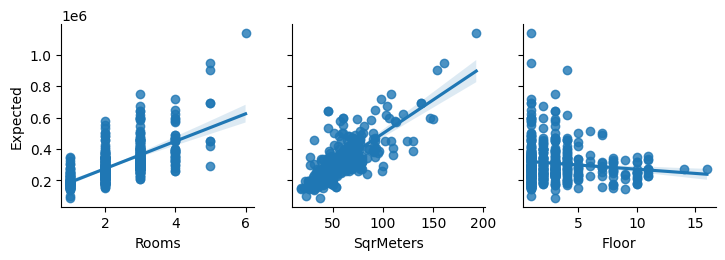

In [ ]:
g = sns.PairGrid(df[:500], y_vars=["Expected"], x_vars=["Rooms", "SqrMeters", "Floor"])
g.map(sns.regplot);

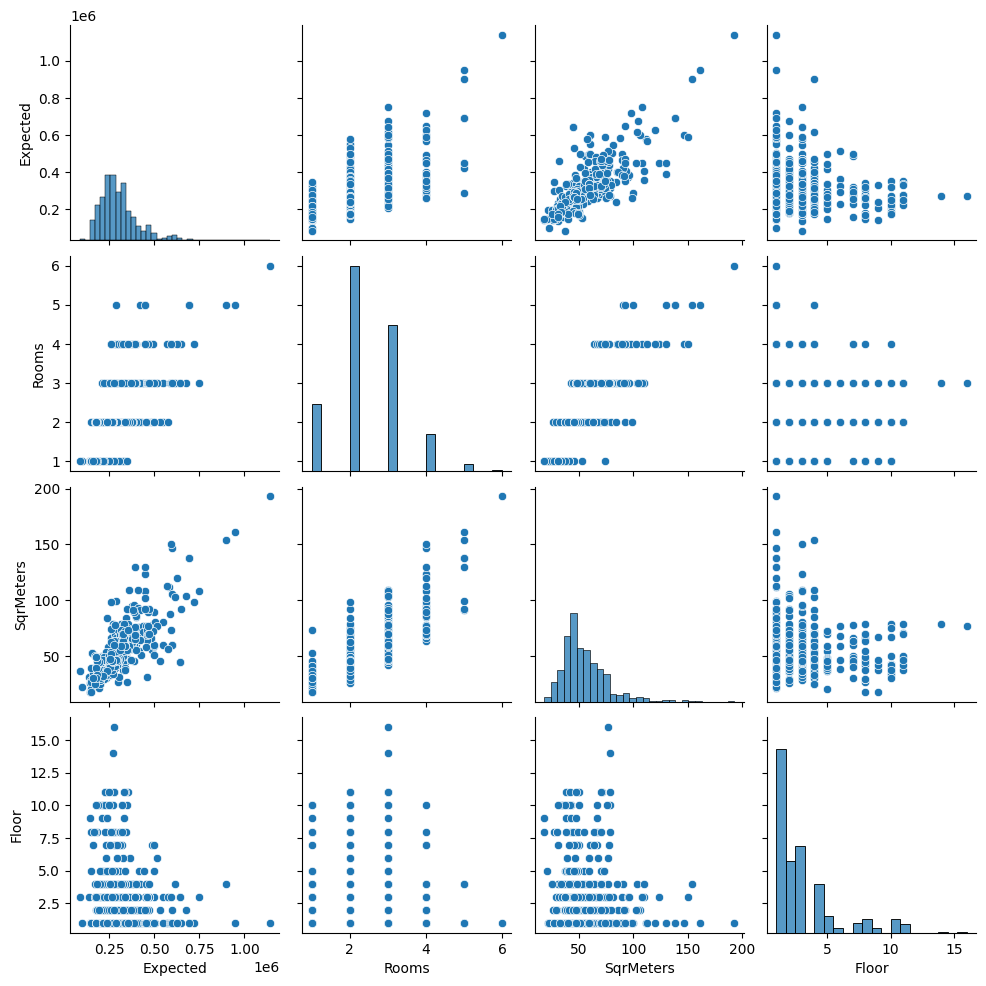

In [ ]:
sns.pairplot(df[:500][['Expected', 'Rooms', 'SqrMeters', 'Floor']]);

In [ ]:
def plot_points(dataframe, label, color='r'):
    plt.scatter(dataframe[label], dataframe['Expected'], c=color)
    plt.xlabel(label)
    plt.ylabel('Cena')
    plt.show()

#### Zadanie 3

W dalszej części będziemy wykorzystywać jedynie zmienne numeryczne, tj. powierzchnię, numer piętra i liczbę pokoi. 
Podziel dane na zbiór uczący i testowy, zbuduj dwa modele regresyjne: linowy i drzewo decyzyjne, a następnie porównaj ich skuteczność korzystając z wybranej metryki.

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
import statsmodels.api as sma
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
X = df[['Rooms', 'SqrMeters', 'Floor']].values
y = df['Expected'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X = df[['Rooms', 'SqrMeters', 'Floor']]
y = df['Expected']
X2 = sma.add_constant(X_train)
OLS_model = sma.OLS(y_train, X2)

print(OLS_model.fit().summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     21.98
Date:                Thu, 06 Apr 2023   Prob (F-statistic):           4.07e-14
Time:                        18:44:26   Log-Likelihood:                -59795.
No. Observations:                4000   AIC:                         1.196e+05
Df Residuals:                    3996   BIC:                         1.196e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.049e+05   3.83e+04      2.738      0.0

In [ ]:
model_reg = LinearRegression()
model_reg.fit(X_train, y_train)
y_pred_reg = model_reg.predict(X_test)
model_reg.coef_

array([ 5568.24196264,  4012.76513632, -3875.53654065])

In [ ]:
model_dt = DecisionTreeRegressor()
model_dt.fit(X_train, y_train)
y_pred_dt = model_dt.predict(X_test)

In [ ]:
mae_reg = mean_absolute_error(y_pred_reg, y_test)
mae_dt = mean_absolute_error(y_pred_dt, y_test)

print(f"Regression: {mae_reg}")
print(f"Decission Tree: {mae_dt}")

Regression: 119787.2903452921
Decission Tree: 154310.3577909891


In [ ]:
mse_reg = mean_squared_error(y_pred_reg, y_test)
mse_dt = mean_squared_error(y_pred_dt, y_test)

print(f"Regression: {mse_reg}")
print(f"Decission Tree: {mse_dt}")

Regression: 1767673452743.7234
Decission Tree: 3082712340179.659


#### Zadanie 4

Podziel dane na 3 zbiory: uczący, walidacyjny i testowy. Dla modelu drzewa decyzyjnego przetestuj różne wartości parametru `min_samples_split` ewaluując model na zbiorze walidacyjnym. Narysuj wykres jak wartość tego parametru wpływa na wartość wybranej metryki na zbiorze treningowym i walidacyjnym, a następnie wybierz optymalną wartość, policz wybraną metrykę dla zbioru testowego i porównaj z wynikiem otrzymanym w *Zadaniu 3*.

In [ ]:
X = df[['Rooms','SqrMeters','Floor']].values
y = df['Expected'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_wal, y_train, y_wal = train_test_split(X_train, y_train, test_size=0.25, random_state=42)


In [ ]:
from sklearn.metrics import r2_score

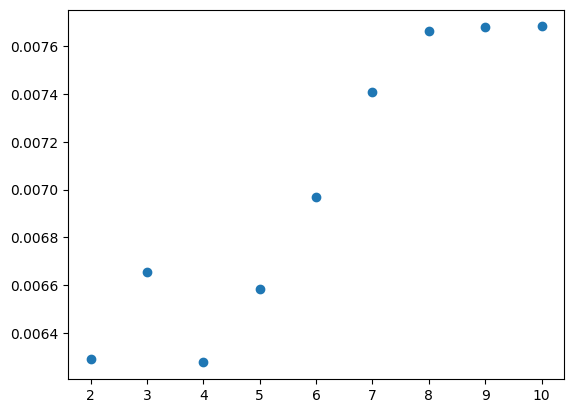

In [ ]:
results = []

for i in range(2,11):
  model_dt = DecisionTreeRegressor(min_samples_split=i)
  model_dt.fit(X_train, y_train)
  y_pred_dt = model_dt.predict(X_wal)
  results.append(r2_score(y_true=y_wal, y_pred=y_pred_dt))

plt.scatter(x=range(2,11), y=results)

In [ ]:
def train_and_calculate_mse(min_samples_split):
  model = DecisionTreeRegressor(min_samples_split=min_samples_split)
  model.fit(X_train, y_train)
  y_pred_train = model.predict(X_train)
  y_pred_wal = model.predict(X_wal)

  results_wal = (mean_squared_error(y_true=y_wal, y_pred=y_pred_wal))
  results_train = (mean_squared_error(y_true=y_train, y_pred=y_pred_train))
  print(f'MSE train for min_samples_split = {min_samples_split}: ', results_train)
  print(f'MSE wal for min_samples_split = {min_samples_split}: ', results_wal)

  return results_train, results_wal


In [ ]:
train_metrics = []
wal_metrics = []
for min_sample_split in range(2,20):
  train_score, wal_score = train_and_calculate_mse(min_sample_split)
  train_metrics.append(train_score)
  wal_metrics.append(wal_score)

MSE train for min_samples_split = 2:  1563744501.7693706
MSE wal for min_samples_split = 2:  1318052828908.7227
MSE train for min_samples_split = 3:  2114764007.9523704
MSE wal for min_samples_split = 3:  1318256057085.7886
MSE train for min_samples_split = 4:  206563462961.98282
MSE wal for min_samples_split = 4:  1318305228701.3628
MSE train for min_samples_split = 5:  206740405281.8384
MSE wal for min_samples_split = 5:  1317881424029.832
MSE train for min_samples_split = 6:  207059956855.8747
MSE wal for min_samples_split = 6:  1317508305076.676
MSE train for min_samples_split = 7:  207298698874.30667
MSE wal for min_samples_split = 7:  1316927045763.8613
MSE train for min_samples_split = 8:  207819514839.86392
MSE wal for min_samples_split = 8:  1316582451128.12
MSE train for min_samples_split = 9:  208009149260.65353
MSE wal for min_samples_split = 9:  1316568451231.769
MSE train for min_samples_split = 10:  208127588177.93213
MSE wal for min_samples_split = 10:  1316563389218.25

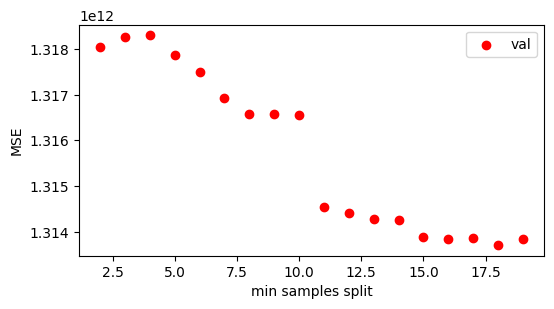

In [ ]:
plt.figure(figsize=(6, 3))
# plt.scatter(range(2,101,10), train_metrics, c='b', label='train')
plt.scatter(range(2,20), wal_metrics, c='r', label='val')
plt.ylabel('MSE')
plt.xlabel('min samples split')
plt.legend()
plt.show()

#### Zadanie 5

Przetestuj różne wartosci parametru `min_samples_split` raz jeszcze, tym razem przy użyciu walidacji krzyżowej. Po dobraniu odpowiedniej wartości przetrenuj jeszcze raz model na całym zbiorze treninggowym, a następnie porównaj wartość metrykki na zbiorze testowym z poprzednimi rezultatami. Czy wynik jest podobny, czy w obu przypadkach optymalna okazała się ta sama wartość parametru?

In [4]:
df = pd.read_csv('gratkapl.csv', encoding='unicode_escape')
df.head()

,Id,Expected,Rooms,SqrMeters,Floor,Location,Description
0,1,269000,3,55.00,1,PoznaÅ Zawady,Przedmiotem sprzedaÅ¼y jest mieszkanie poÅoÅ¼...
1,2,320000,3,79.00,10,PoznaÅ Rataje ul. OrÅa Bialego,Na sprzedaÅ¼ duÅ¼e sÅoneczne mieszkanie 3-pok...
2,3,146000,1,31.21,1,PoznaÅ Nowe Miasto ul. Kawalerka W Nowym Blok...,GorÄ co zachÄcam do zapoznania siÄ z ofertÄ ...
3,4,189000,2,44.00,2,PoznaÅ Grunwald Ogrody JeÅ¼yce Centrum Åazar...,BEZPIECZNA TRANSAKCJA JEDYNIE Z DOÅWIADCZONYM...
4,5,480240,2,65.25,1,PoznaÅ ul. Droga DÄbiÅska 19,NieruchomoÅci Mieszkania NieruchomoÅci Miesz...


In [9]:
X = df[['Rooms','SqrMeters','Floor']]
y = df['Expected']

In [6]:
from sklearn.model_selection import KFold

In [7]:
def train_and_calculate_mse(X_train, y_train, X_test, y_test, min_samples_split=2):
  model = DecisionTreeRegressor(min_samples_split=min_samples_split)
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  mse = mean_squared_error(y_test, y_pred)
  return mse

In [18]:
cv = KFold(shuffle=True, random_state=42)
score = []
for train, test in cv.split(X, y):
  X_train, y_train = X.iloc[train], y.iloc[train]
  X_test, y_test = X.iloc[test], y.iloc[test]
  score.append(train_and_calculate_mse(X_train, y_train, X_test, y_test))
print(sum(score)/len(score))

1517500651085.5618
